In [15]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Weather Image Classification'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [17]:
# Getting labels of training data
labels = os.listdir('/content/drive/MyDrive/Weather Image Classification')
labels

['Cloudy', 'Rain', 'Sunrise', 'Shine']

In [21]:
DATADIR= '/content/drive/MyDrive/Weather Image Classification'
IMG_SIZE=100

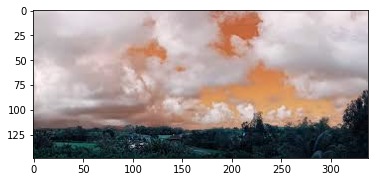

In [22]:
import cv2
import matplotlib.pyplot as plt
for category in labels:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [23]:
training_data=[]
def create_training_data():
    for category in labels:
        path=os.path.join(DATADIR, category)
        class_num=labels.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [24]:
print(len(training_data))

2737


In [25]:
lenofimage = len(training_data)

In [26]:
import numpy as np

X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [27]:
X.shape

(2737, 30000)

In [28]:
X = X/255.0

In [29]:
X[1]

array([0.50196078, 0.37647059, 0.31764706, ..., 0.34117647, 0.27843137,
       0.23137255])

In [30]:
y=np.array(y)

In [31]:
y.shape

(2737,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
X_train.shape

(2052, 30000)

In [34]:
X_test.shape

(685, 30000)

In [35]:
y_train.shape

(2052,)

In [36]:
y_test.shape

(685,)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)

y_pred

array([0, 3, 1, 1, 3, 0, 1, 0, 2, 2, 3, 1, 1, 3, 2, 1, 0, 1, 2, 0, 1, 1,
       2, 0, 1, 3, 2, 1, 1, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0,
       3, 0, 3, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2,
       1, 0, 3, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0,
       3, 2, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 3, 0, 2, 2, 1, 2, 1,
       3, 2, 2, 2, 0, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1,
       2, 3, 3, 3, 2, 0, 1, 1, 1, 3, 0, 1, 1, 0, 1, 2, 1, 3, 1, 3, 3, 0,
       0, 0, 0, 0, 1, 0, 1, 3, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 3, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 3, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 3,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 3, 1, 0, 0, 0, 1, 0,
       0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 3, 2, 2, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 0, 0, 0, 2, 3, 1, 3, 2, 1, 1, 1,

In [39]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is :-")
print(classification_report(y_test, y_pred))

Accuracy on unknown data is :-
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       226
           1       0.73      0.83      0.78       187
           2       0.87      0.80      0.83       157
           3       0.76      0.50      0.60       115

    accuracy                           0.74       685
   macro avg       0.76      0.72      0.73       685
weighted avg       0.75      0.74      0.74       685



In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[170  35   8  13]
 [ 19 156   7   5]
 [ 24   8 125   0]
 [ 40  14   4  57]]


In [41]:
# calculating the overall acuracy using knn.score
acc=knn.score(X_test, y_test)
print(f'accuracy from knn.score = {acc:.4}') # {acc:.4} will include 4 digits after decimal

# calculating the overall acuracy using metrics.accuracy_score
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print(f'accuracy from metrics.accuracy_score = {acc:.4}') # {acc:.4} will include 4 digits after decimal


accuracy from knn.score = 0.7416
accuracy from metrics.accuracy_score = 0.7416


In [42]:
# calculating the balanced accuracy using metrics.accuracy_score
acc=metrics.accuracy_score(y_test, y_pred)
print(f'accuracy = {acc:.4}') # {acc:.4} will include 4 digits after decimal

accuracy = 0.7416


In [43]:
import pandas as pd

result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})

In [44]:
result

,original,predicted
0,0,0
1,3,3
2,1,1
3,1,1
4,3,3
...,...,...
680,2,2
681,3,0
682,2,2
683,0,0


In [45]:
# original & predicted value for all rows present in dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

result

,original,predicted
0,0,0
1,3,3
2,1,1
3,1,1
4,3,3
5,0,0
6,1,1
7,0,0
8,3,2
9,2,2


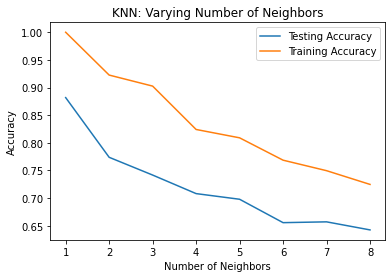

In [46]:
#curves 
import numpy as np
import matplotlib.pyplot as plt

no_neighbors = np.arange(1, 9)

train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('KNN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()